In [ ]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

# CS-E4850 Computer Vision Exercise Round 7

### Name:Edvard Ohlström
### Student number:729255

The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

In [22]:
import math

terms = ['cat', 'dog', 'mammals', 'mouse', 'pet']
doc_freq = [5, 20, 2, 10, 60]
N = 100  

documents = [
    "Cat is a pet, dog is a pet, and mouse may be a pet too.",
    "Cat, dog and mouse are all mammals.",
    "Cat and dog get along well, but cat may eat a mouse."
]
query = "mouse, cat, pet, mammals"

# a) Compute IDF for each term
idf = {}
for term, df in zip(terms, doc_freq):
    idf[term] = math.log2(N / df)

# b) Compute term frequencies for query and each document
def term_frequency(text):
    tf = {}
    for term in terms:
        tf[term] = text.lower().count(term)
    return tf

tf_query = term_frequency(query)
tf_docs = [term_frequency(doc) for doc in documents]

# c) Compute tf-idf histograms
def compute_tf_idf(tf, idf):
    return {term: freq * idf[term] for term, freq in tf.items()}

tf_idf_query = compute_tf_idf(tf_query, idf)
tf_idf_docs = [compute_tf_idf(tf, idf) for tf in tf_docs]

# d) Cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1[term] * vec2[term] for term in terms)
    magnitude1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
    return dot_product / (magnitude1 * magnitude2)

similarities = [cosine_similarity(tf_idf_query, doc) for doc in tf_idf_docs]


ranking = sorted(enumerate(similarities, 1), key=lambda x: x[1], reverse=True)


/tmp/ipykernel_440/120060129.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(terms, rotation=45)


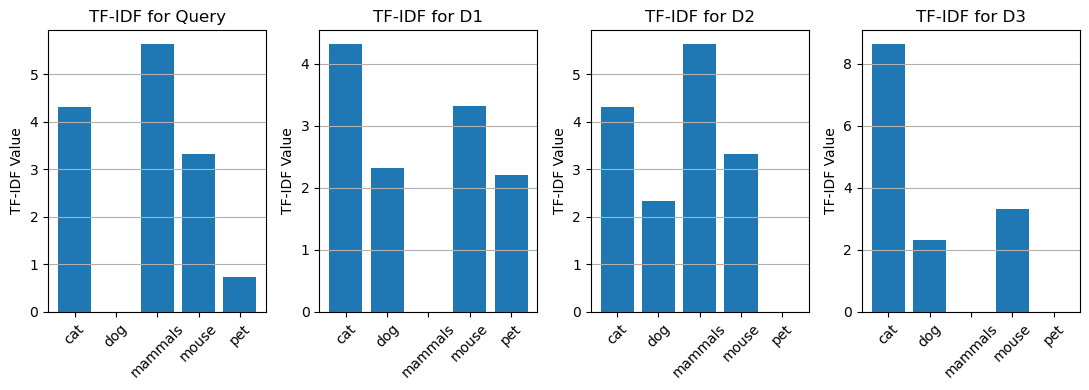

In [23]:
import matplotlib.pyplot as plt

def plot_histogram(ax, tf_idf_values, title):
    ax.bar(tf_idf_values.keys(), tf_idf_values.values())
    ax.set_title(title)
    ax.set_ylabel('TF-IDF Value')
    ax.set_xticklabels(terms, rotation=45)
    ax.grid(axis='y')

fig, axes = plt.subplots(1,4 , figsize=(11, 4))

plot_histogram(axes[0], tf_idf_query, 'TF-IDF for Query')
for i, tf_idf in enumerate(tf_idf_docs, 1):
    plot_histogram(axes[i], tf_idf, f'TF-IDF for D{i}')

plt.tight_layout()
plt.show()


In [26]:
# Display the results in a compact manner

print("IDF")
print(", ".join([f"{term}: {value:.4f}" for term, value in idf.items()]))

print("TF for Query ")
print(", ".join([f"{term}: {value}" for term, value in tf_query.items()]))

for i, tf in enumerate(tf_docs, 1):
    print(f"TF for D{i} ")
    print(", ".join([f"{term}: {value}" for term, value in tf.items()]))

print("TF-IDF for Query ")
print(", ".join([f"{term}: {value:.4f}" for term, value in tf_idf_query.items()]))

for i, tf_idf in enumerate(tf_idf_docs, 1):
    print(f"TF-IDF for D{i} ")
    print(", ".join([f"{term}: {value:.4f}" for term, value in tf_idf.items()]))

print("Similarities ")
print(", ".join([f"Q vs. D{i+1}: {sim:.4f}" for i, sim in enumerate(similarities)]))

print("Ranking ")
print(", ".join([f"{i+1}. D{rank[0]} ({rank[1]:.4f})" for i, rank in enumerate(ranking)]))


IDF
cat: 4.3219, dog: 2.3219, mammals: 5.6439, mouse: 3.3219, pet: 0.7370
TF for Query 
cat: 1, dog: 0, mammals: 1, mouse: 1, pet: 1
TF for D1 
cat: 1, dog: 1, mammals: 0, mouse: 1, pet: 3
TF for D2 
cat: 1, dog: 1, mammals: 1, mouse: 1, pet: 0
TF for D3 
cat: 2, dog: 1, mammals: 0, mouse: 1, pet: 0
TF-IDF for Query 
cat: 4.3219, dog: 0.0000, mammals: 5.6439, mouse: 3.3219, pet: 0.7370
TF-IDF for D1 
cat: 4.3219, dog: 2.3219, mammals: 0.0000, mouse: 3.3219, pet: 2.2109
TF-IDF for D2 
cat: 4.3219, dog: 2.3219, mammals: 5.6439, mouse: 3.3219, pet: 0.0000
TF-IDF for D3 
cat: 8.6439, dog: 2.3219, mammals: 0.0000, mouse: 3.3219, pet: 0.0000
Similarities 
Q vs. D1: 0.6289, Q vs. D2: 0.9547, Q vs. D3: 0.6432
Ranking 
1. D2 (0.9547), 2. D3 (0.6432), 3. D1 (0.6289)


## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)


![alt text](Screenshot.png)

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.






## Stage I.A


<b>Question</b>: Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

Density is changing because of different lightning condition. The picture on the right side has a lot less distinct features and therefore density is lower. Matching will probably a bit inaccurate but pictures still has similar features and some parings will be succesful. To make the matching better techniques such as keypoint filtering and and local feature normalization.


<b>Question</b>: Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?

When a feature is detected multiple times in a random or non distnicunal order. This can be caused by regions of repetetive patterns or abstract patterns without sence of direction. For example chess board or the sun. 



## Stage I.B

<b>Question</b>: Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

Descriptors are first divided into a 4x4 matrix where each subsection uses 8 gradient orentations. Gradients are less sensitive to ilumination changes and pooling of gradients over sub-patches acchives robustness and bettter preservation of spatial imformation contrary to detection which is point pixel vectors.   


<b>Question</b>: Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?


Yes, the change in lighting is probably the problem. From the image, it seems like one side has more shadows and possibly different lighting conditions compared to the other. This can cause the SIFT descriptors to appear different even for the same scene points. Another problem may be reperative patterns where there are similar patterns inside the nearest neighbour. Use algorithms like RANSAC as this can improve results or use Lowes test as shown in next assignment. 



## Stage I.C


<b>Question</b>: Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?

The rest of the mismatches can be removed by trying different values for nnThreshold. Even though the assignment presents 0.8 as good compromise an values of 0.5 seems to be more accurate by observation. Otherwise the rest of the problems are same as in the earlier assignment.

- Repetitive Patterns: If there's a repetitive texture or pattern in the scene, even with the 2nd NN test, some mismatches might still be present.
- Lighting Variations: Extreme lighting changes can cause descriptors of the same scene point to differ significantly





## Stage II


<b>Question</b>: The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?

Affine-covariant keypoints are designed to detect the regions close to affine transformations. SIFT descriptors capture the local features around these keypoints and despite the overall planar homography between images, over small patches, this can approximate to affine. Therefore, descriptors can realiabily find matches in the images.



## Stage III.A

<b>Questions</b>: The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?

A larger vocabulary offers more specificity, potentially reducing false matches but might increase false negatives. A smaller vocabulary might lump different features together, increasing false positives. Therefore there is an tradeoff.


<b>Questions</b>: In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?

Quantization is typically a one-time cost per image and can be pre-computed for stored images.

<b>Questions</b>: What is the speedup in searching a large, fixed database of 10, 100, 1000 images? 

Bag of words provides considerable speedup when searching in larger databases. Direct matching scales linearly with database size, whereas BoW, using an inverted index, remains relatively constant, making it efficient.


## Stage III.B 

<b>Question</b>: Why does the top image have a score of 1 (0.9698 in python)?

The top image has a score close to 1 because it is essentially the same image as the query image. The reson for this is to test that the systme can retrive and recoginse the intended picture.


## Stage III.C


<b>Question</b>: Why is the top score much larger than 1 now?<br>

Because we use another system to rankt the pictures. In the first example we used score based on histogram similarities, where the maximum score of 1. Insted now we use a score representing the count of inliers, which is an integer depending on the actual matches found,

<b>Question</b>: Are the retrieval results improved after geometric verification?

Yes, in the first example 6 of the best rated picutres where the same house as the comparable picture when in the geometric verification found 10 pictures.